# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Pipeline classif infox supervisé dataset labels

---

# Observations et environnement
---

In [1]:
random_state = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns

In [4]:
import patat.util.pd

filename = 'data/prod/230512-OIDS-Label.csv'

df_label = patat.util.pd.df_from_csvjson(['tags','paragraphs'],filename)

df_label['infox'].isna().sum()

df_label = df_label[df_label['infox'].notna()]

In [5]:
df_label['infox'].isna().sum()

0

In [6]:
df_label = df_label[df_label['infox'].notna()]

In [7]:
df_label.reset_index(inplace=True)

# Experience
---

## Ignore Words

In [8]:
import patat.util.text
import patat.ml.lex_analyser
lex = patat.ml.lex_analyser.LexAnalyser()

### Words

In [9]:
preprocessor = patat.util.text.preprocess
tokenizer = lex.get_lemmas_from_text
#tokenizer = lex.get_words
#tokenizer=None

In [10]:
df_words = lex.get_df_words(texts= df_label['text'],values = df_label['infox'].astype(int), preprocessor=preprocessor, tokenizer= tokenizer)
### Rare Words
for occ_rare in [1,2,3,4,5,6,7]:
    df_words['rare_'+str(occ_rare)]=(df_words['count_0']<=occ_rare)&(df_words['count_1']<=occ_rare)
### Common words
for common_size in [50,80,120,200,500]:
    common_0 = df_words.sort_values('count_0',ascending=False).head(common_size).index
    common_1 = df_words.sort_values('count_1',ascending=False).head(common_size).index
    df_words['common_'+str(common_size)]=(df_words.index.isin(common_0))&(df_words.index.isin(common_1))
### Ignore Lemmas
ignore_words={
    'None' : None,
    'small' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index),
    'medium' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index),
    'large' : list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index),
    'xlarge' : list(df_words[df_words['common_500']].index)+list(df_words[df_words['rare_7']].index),
}

/opt/homebrew/Caskroom/miniforge/base/envs/pt39/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
df_words

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
de,23761,33432,57193,False,False,False,False,False,False,False,True,True,True,True,True
la,13334,17797,31131,False,False,False,False,False,False,False,True,True,True,True,True
le,9708,13854,23562,False,False,False,False,False,False,False,True,True,True,True,True
et,9442,14462,23904,False,False,False,False,False,False,False,True,True,True,True,True
les,9065,14380,23445,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
joachim,0,2,2,False,True,True,True,True,True,True,False,False,False,False,False
jocelyn,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
joel,0,3,3,False,False,True,True,True,True,True,False,False,False,False,False
joffe,0,12,12,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
common_200 = list(df_words[df_words['common_200']].index)

In [13]:
common_80 = list(df_words[df_words['common_80']].index)

## Textes partiels

In [14]:
def partial_texts(text,p_count):
    parags = text.split('\n')
    result='\n'.join(parags[:p_count])
    return result

In [15]:
text = df_label.sample(frac=1).iloc[0]['text']

In [16]:
text

"L’affaire Jean-Michel Macron-Trogneux, un malaise démocratique français\nDe :\xa0https://lecourrierdesstrateges.fr/2022/05/01/laffaire-jean-michel-macron-trogneux-un-malaise-democratique-francais/\nparÉric Verhaeghe\n1 May 2022\nAprès\n une longue réflexion, le Courrier a décidé de parler de l'affaire \nJean-Michel Trogneux, qui occupe de nombreux esprits et de nombreuses \nconversations dans le plus parfait silence des médias subventionnés. \nNous faisons le choix d'en parler à cause de cette discrépance entre les\n conversations en ville et le silence de la presse stipendiée par le \nrégime et cartellisée par les milliardaires qui ont fait l'élection \nd'Emmanuel Macron. Il nous semble qu'il y a là l'indice d'une \ndéconnexion qui résume à elle seule le malaise démocratique français.  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJusqu’ici, nous n’avons jamais évoqué l’excellente, \nl’époustouflante enquête de Xavier Poussard et de son Faits & \nDocuments, s

In [17]:
pt = partial_texts(text,2)
print(pt)

L’affaire Jean-Michel Macron-Trogneux, un malaise démocratique français
De : https://lecourrierdesstrateges.fr/2022/05/01/laffaire-jean-michel-macron-trogneux-un-malaise-democratique-francais/


## Tests Entrainement

In [18]:
df_label=df_label.sample(frac=1,random_state=random_state)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [20]:
nb_parags = 1

def cut_text(text):
    return partial_texts(text,nb_parags)

In [32]:
logreg = LogisticRegression(C=200, random_state=random_state, solver='lbfgs', multi_class='ovr', max_iter=1000)
neuralnet = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), random_state=random_state)

In [33]:
iw = ignore_words['small']

pipelineLR = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=preprocessor, tokenizer=None, stop_words=iw)), 
    ('classifier',logreg)
                  ])

pipelineMLPC = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=preprocessor, tokenizer=None, stop_words=iw)), 
    ('classifier',neuralnet)
                  ])

In [34]:
df_means = {}
for nb_parags in [1,2,3,5,8,13,21,34]:
    
    print(f'Crossvalidating nb_parags={nb_parags}')

    X = df_label['text'].apply(cut_text)
    y = df_label['infox']

    #classifier = pipelineMLPC
    classifier = pipelineLR
    scores = cross_validate(classifier, X, y, cv=5,scoring=('roc_auc','f1','accuracy','precision','recall'))
    df_scores=pd.DataFrame(scores)
    df_means[nb_parags] = df_scores.describe().loc['mean']


Crossvalidating nb_parags=1
Crossvalidating nb_parags=2
Crossvalidating nb_parags=3
Crossvalidating nb_parags=5
Crossvalidating nb_parags=8
Crossvalidating nb_parags=13
Crossvalidating nb_parags=21
Crossvalidating nb_parags=34


In [35]:
bench = pd.DataFrame(df_means)
bench

,1,2,3,5,8,13,21,34
fit_time,0.062474,0.113999,0.155275,0.220374,0.311438,0.375374,0.495195,0.552075
score_time,0.008143,0.016905,0.026648,0.044465,0.067146,0.096661,0.124077,0.148486
test_roc_auc,0.718324,0.775306,0.803073,0.816737,0.841230,0.848732,0.856456,0.860272
test_f1,0.588437,0.644397,0.656802,0.677292,0.696525,0.716890,0.729677,0.745458
test_accuracy,0.665922,0.718436,0.736313,0.747486,0.760894,0.776536,0.783240,0.794413
test_precision,0.614239,0.691992,0.724391,0.739351,0.750579,0.773589,0.772125,0.784745
test_recall,0.566140,0.603228,0.603088,0.627123,0.650877,0.669404,0.693123,0.711684


<Axes: >

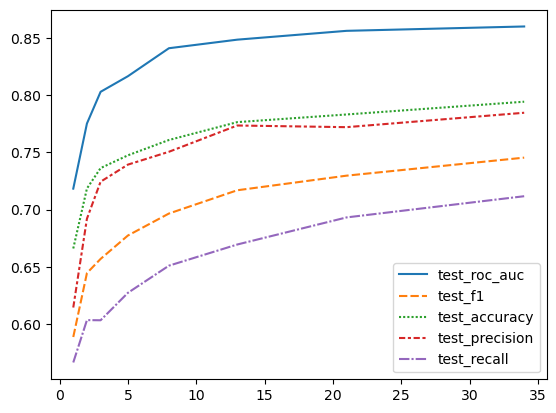

In [36]:
sns.lineplot(data=bench.T.drop(columns=['fit_time','score_time']))

In [31]:
df = df_label[df_label['p_count']<200]

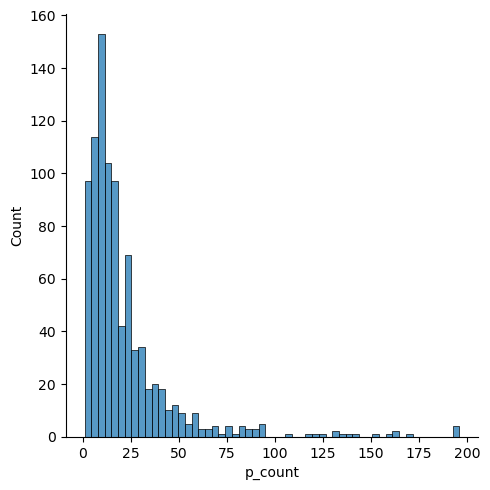

In [55]:
sns.displot(df,x='p_count')

In [49]:
df

,index,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,...,sophisme,inversion_preuve,denigrement,degre_infox,observateur,source,p_count,text,c_count,p_size
882,882,https://infodujour.fr/sante/4783-le-vaccin-un-...,infodujour.fr,"Le vaccin, un médicament pas tout à fait comme...","Hervé Le Louët, Université Paris-Est Créteil V...",[],[Le vaccin contre la grippe saisonnière est ar...,2016-10-11T06:53:33+01:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Test2,14,"Le vaccin, un médicament pas tout à fait comme...",7241,517.214286
277,277,https://lemediaen442.fr/onu-le-premier-ministr...,lemediaen442.fr,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,"[Mot-clés : censure, jacinda ardern, ONU, Post...",[L’argument principal de la ministre est que l...,2022-09-29T09:56:31+02:00,"Le terrible discours de Jacinda Ardern, Premie...",NaN,...,0.0,0.0,0.0,1.0,FB,Recueil,7,ONU – Le Premier ministre de Nouvelle-Zélande ...,2419,345.571429
709,709,https://www.breizh-info.com/2019/10/03/128006/...,www.breizh-info.com,« Mon Tro Breizh » : un « Compostelle breton »...,"Le Tro Breiz toute l’année, voilà l’ambition d...","[Le Mag', Local, Patrimoine, Religion, compost...","[Le Tro Breiz toute l’année, voilà l’ambition ...",2019-10-03T00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Verif,10,« Mon Tro Breizh » : un « Compostelle breton »...,3123,312.300000
242,242,https://lecourrier-du-soir.com/la-russie-crach...,lecourrier-du-soir.com,La Russie crache le morceau : « le but des Eta...,La guerre en Ukraine est-elle l’opportunité ta...,[InternationalAmérique du NordEuropePolitique],[La guerre en Ukraine est-elle l’opportunité t...,2022-10-31T09:09:49+00:00,NaN,Cheikh Dieng,...,0.0,1.0,0.0,1.0,FB,Recueil,5,La Russie crache le morceau : « le but des Eta...,2043,408.600000
742,742,https://www.francetvinfo.fr/replay-radio/l-emp...,www.francetvinfo.fr,L'empire des séries. Les nouvelles saisons les...,C’est à la fois la série des nostalgiques d’E....,[],[C’est à la fois la série des nostalgiques d’E...,2021-12-29T10:31:00,"""Stranger things"", ""The Crown"", ""En thérapie"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,Test1,4,L'empire des séries. Les nouvelles saisons les...,2590,647.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,626,https://www.wikistrike.com/2022/09/11-septembr...,www.wikistrike.com,11 septembre 2001 : La théorie du « complot pi...,Le 11 septembre pour les nuls\nEst-il vrai que...,[],"[Est-il vrai que 9/11 was an inside job ? Oui,...",2022-09-29T00:00:00,NaN,NaN,...,0.0,0.0,0.0,2.0,FB,Recueil,46,11 septembre 2001 : La théorie du « complot pi...,46690,1015.000000
172,172,https://www.francesoir.fr/politique-monde/disc...,www.francesoir.fr,"Discours de politique générale: huée, Élisabet...",Devant une Assemblée nationale où elle ne déti...,[],[Devant une Assemblée nationale où elle ne dét...,2022-07-07T18:50:00,NaN,NaN,...,0.0,0.0,NaN,NaN,FB,Recueil,11,"Discours de politique générale: huée, Élisabet...",3985,362.272727
252,252,https://www.lelibrepenseur.org/manifestations-...,www.lelibrepenseur.org,Manifestations importantes d’agriculteurs aux ...,Cela fait déjà plusieurs jours que des manifes...,"[in\nÀ la une, Géopolitique, Vidéos]",[Cela fait déjà plusieurs jours que des manife...,2022-07-08T00:00:00,NaN,NaN,...,0.0,0.0,NaN,1.0,GP,Recueil,1,Manifestations importantes d’agriculteurs aux ...,805,805.000000
499,499,https://www.preuvesduparanormal.fr/2022/07/17/...,www.preuvesduparanormal.fr,Des centaines de personnes regardent l’apparit...,"Le divin est surnaturel, mais la religion est ...",[paranormal Spiritualite],"[Le divin est surnaturel, mais la religion est...",2022-07-17T05:47:08+00:00,NaN,NaN,...,0.0,1.0,NaN,2.0,GP,Recueil,10,Des centaines de personnes regardent l’apparit...,4916,491.600000


## Entrainement sur tout le dataset

In [ ]:
predictor = pipelineLR
predictor.fit(df_label['text'], df_label['infox'])

In [ ]:
df_label['predict_infox']=predictor.predict_proba(df_label['text'])[:,1]
sns.displot(df_label,x='predict_infox')

# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---